In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv("PS_20174392719_1491204439457_log.csv")
dataframe.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
dataframe.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
dataframe = dataframe.drop(columns=['nameOrig', 'nameDest'])

In [6]:
dataframe.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [7]:
labelEncoder = LabelEncoder()
dataframe['type'] = labelEncoder.fit_transform(dataframe['type'])

In [8]:
dataframe.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int32(1), int64(3)
memory usage: 412.6 MB


In [10]:
dataframe.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve

In [12]:
x_data = dataframe.drop(columns=['isFraud', 'isFlaggedFraud'])
y_data = dataframe['isFraud']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [14]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
predict_y_logmodel = logmodel.predict(X_test)

In [16]:
accuracy_logmodel = accuracy_score(y_test, predict_y_logmodel)
print(f"Accuracy of Logistic Regression Model: {accuracy_logmodel:.2f}")

Accuracy of Logistic Regression Model: 1.00


In [17]:
report_logmodel = classification_report(y_test, predict_y_logmodel)
print(report_logmodel)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.36      0.41      0.38      1620

    accuracy                           1.00   1272524
   macro avg       0.68      0.71      0.69   1272524
weighted avg       1.00      1.00      1.00   1272524



In [18]:
con_matrix_logmodel = metrics.confusion_matrix(y_test,predict_y_logmodel)
con_matrix_logmodel

array([[1269705,    1199],
       [    948,     672]], dtype=int64)

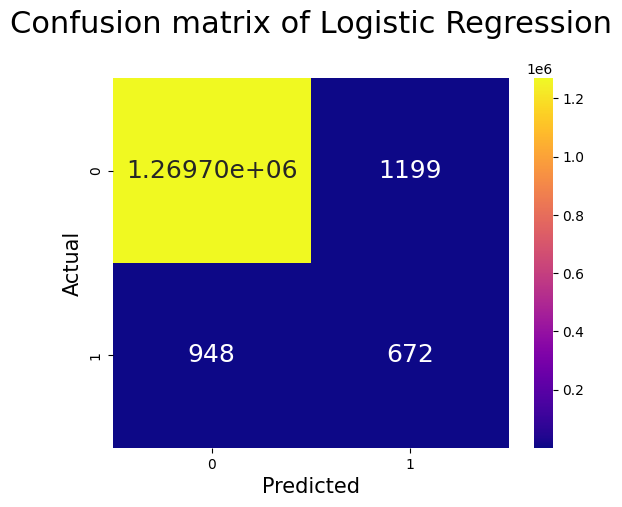

In [19]:
p = sns.heatmap(pd.DataFrame(con_matrix_logmodel), annot=True, annot_kws={"size": 18}, cmap="plasma" ,fmt='g')

plt.title('Confusion matrix of Logistic Regression', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 15)
plt.xlabel('Predicted',fontsize = 15)

plt.show()

In [20]:
predict_y_logmodel_proba = logmodel.predict_proba(X_test)[:, 1]

In [21]:
roc_auc_logmodel = roc_auc_score(y_test, predict_y_logmodel_proba)
print(f"\nAUC-ROC of Logistic Regression: {roc_auc_logmodel:.2f}")


AUC-ROC of Logistic Regression: 0.88


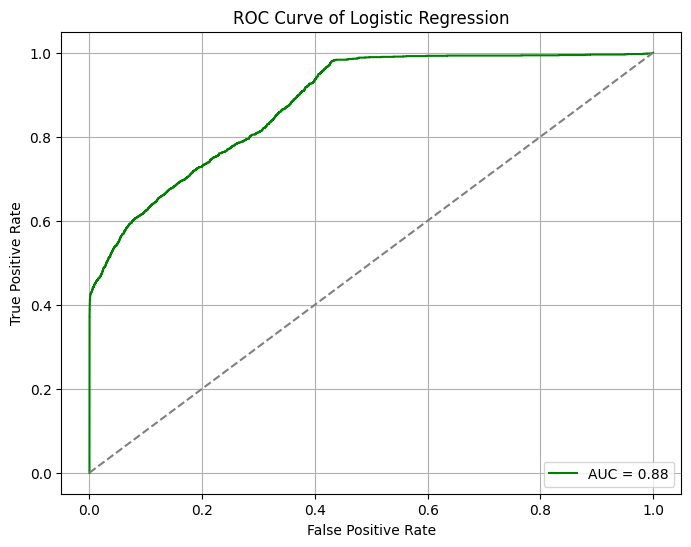

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, predict_y_logmodel_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f"AUC = {roc_auc_logmodel:.2f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [23]:
ddataframe_conf_matrix = pd.DataFrame(
    con_matrix_logmodel,
    columns=["Predicted_Not_Fraud", "Predicted_Fraud"],
    index=["Actual_Not_Fraud", "Actual_Fraud"]
)
ddataframe_conf_matrix.to_csv("dataframe_confusion_matrix.csv")

In [25]:
precision, recall, thresholds = precision_recall_curve(y_test, predict_y_logmodel_proba)
dataframe_pr = pd.DataFrame({
    "Thresholds": np.append(thresholds, 1),  
    "Precision": precision,
    "Recall": recall
})
dataframe_pr.to_csv("dataframe_precision_recall_data.csv", index=False)